# 1. Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Turn project folder path into a string

path = r'/Users/giorjeanmutuc/AirBNB NYC'

In [4]:
# Import data

df_clean = pd.read_csv(os.path.join(path, '01 Data', 'Prepared Data', 'AB_NYC_clean.csv'), index_col = 0)

# 2. Data Cleaning

In [5]:
df_clean.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# Rename columns 

df_clean.rename(columns = {'minimum_nights' : 'min_nights', 'number_of_reviews' : 'total_reviews','reviews_per_month' : 'reviews_per_mon','calculated_host_listings_count' : 'host_listings_count'}, inplace = True)

In [7]:
df_clean.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,min_nights,total_reviews,last_review,reviews_per_mon,host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# Drop categorical columns

df_clean_2 = df_clean.drop(columns = ['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','last_review'])

In [9]:
df_clean_2.head()

,id,price,min_nights,total_reviews,reviews_per_mon,host_listings_count,availability_365
0,2539,149,1,9,0.21,6,365
1,2595,225,1,45,0.38,2,355
2,3647,150,3,0,0.00,1,365
3,3831,89,1,270,4.64,1,194
4,5022,80,10,9,0.10,1,0


# 3. Elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_clean_2).score(df_clean_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-5.898018185530817e+18,
 -1.4582702072987423e+18,
 -5.977357253714834e+17,
 -3.403317815906399e+17,
 -2.289241694494747e+17,
 -1.4278400035651378e+17,
 -1.0741270237656346e+17,
 -8.363416003446456e+16,
 -6.286983052757134e+16]

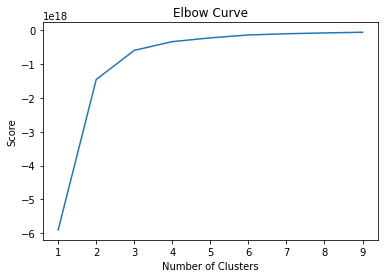

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4. Decide the number of clusters for K-means algorithms

#### The line curves at 2 to 3 then gradually evens out into a consistent line. This means 3 is the optimal count for the clusters.

# 5. Run K-means algorithm

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_init = 1) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_clean_2)

KMeans(n_clusters=3, n_init=1)

# 6. Attach a new column

In [16]:
df_clean_2['clusters'] = kmeans.fit_predict(df_clean_2)

In [19]:
df_clean_2.head()

,id,price,min_nights,total_reviews,reviews_per_mon,host_listings_count,availability_365,clusters
0,2539,149,1,9,0.21,6,365,2
1,2595,225,1,45,0.38,2,355,2
2,3647,150,3,0,0.00,1,365,2
3,3831,89,1,270,4.64,1,194,2
4,5022,80,10,9,0.10,1,0,2


In [20]:
df_clean_2['clusters'].value_counts()

0    16847
1    16827
2    15221
Name: clusters, dtype: int64

# 7. Visualizations

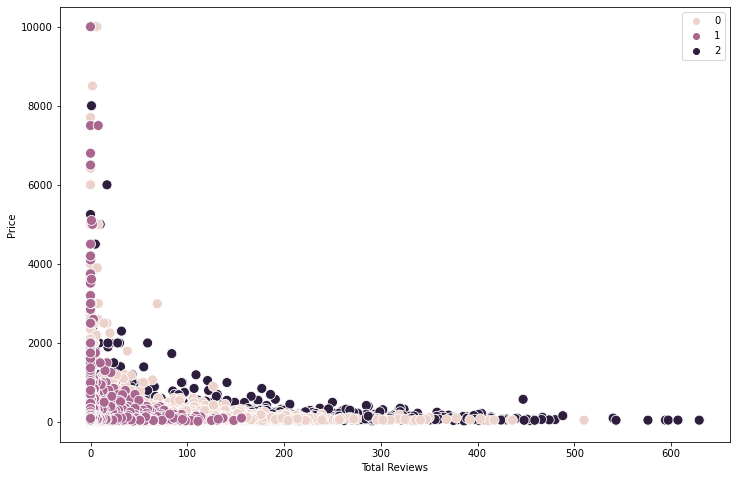

In [29]:
# Plot the clusters for the "price" and "total_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean_2['total_reviews'], y=df_clean_2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Reviews') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

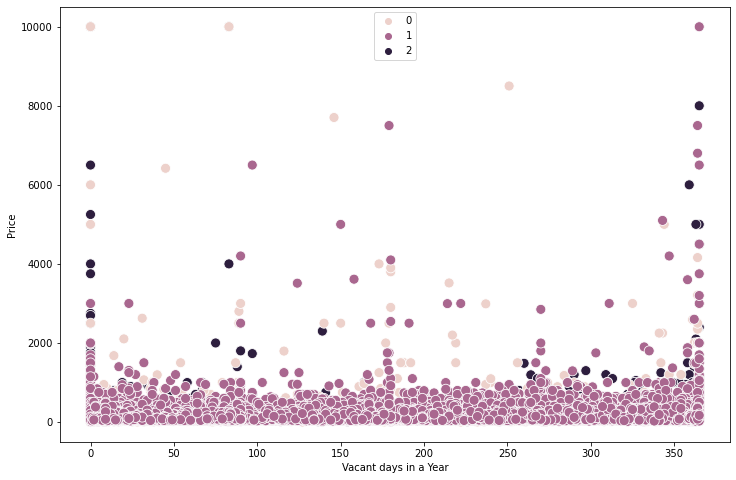

In [27]:
# Plot the clusters for the "price" and "availability_365" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean_2['availability_365'], y=df_clean_2['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Vacant days in a Year') 
plt.ylabel('Price') 
plt.show()

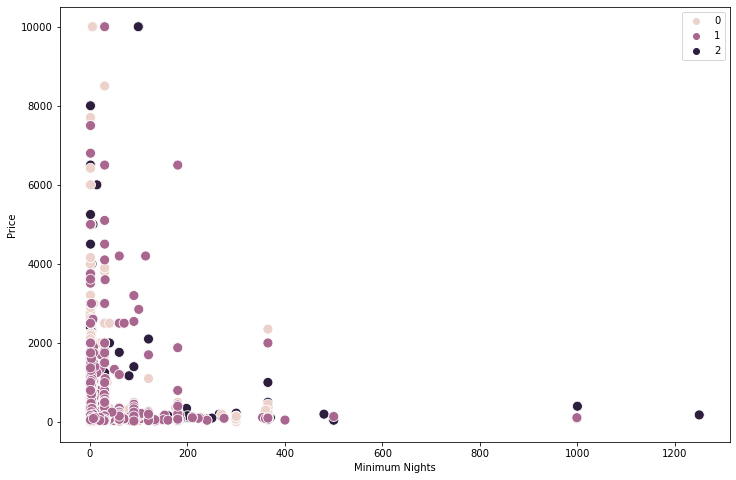

In [28]:
# Plot the clusters for the "price" and "min_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean_2['min_nights'], y=df_clean_2['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Minimum Nights') 
plt.ylabel('Price') 
plt.show()

# 8. Observations based on the clusters

#### For total_reviews and price, all three clusters behave similarly in that both variables are positively related. Cluster 3 (coded 2) is the most popular cluster and it covers a wide range of prices and number of reviews.

#### For availability_365 and price, the second cluster (coded 1) is the most populated where most of the properties are about $2000 and below but are available randomly. 

#### For minimum_nights and price, the second cluster (coded 1) is again the most populated. Interesting to see a property that requires a minimum of 1400 nights for a price very close to zero. 

#### All three charts are not very conclusive. Further analysis is needed to establish the relationships of the variables. 

In [ ]:
# 9. Calculate descriptive statistics for clusters

In [30]:
df_clean_2.loc[df_clean_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_clean_2.loc[df_clean_2['clusters'] == 1, 'cluster'] = 'purple'
df_clean_2.loc[df_clean_2['clusters'] == 0, 'cluster'] = 'pink'

In [32]:
df_clean_2.groupby('cluster').agg({'total_reviews':['mean', 'median'], 
                         'availability_365':['mean', 'median'], 
                         'min_nights':['mean', 'median'],
                          'price':['mean', 'median']})

total_reviews        availability_365        min_nights         \
                     mean median             mean median       mean median   
cluster                                                                      
dark purple     39.062020    9.0       107.485185   10.0   7.492609    3.0   
pink            24.318573    7.0        91.541996   11.0   6.530183    3.0   
purple           7.948357    2.0       138.836572   89.0   7.111844    2.0   

                  price         
                   mean median  
cluster                         
dark purple  155.532225  117.0  
pink         141.917552  100.0  
purple       160.993463  109.0

# 10. Findings

#### Total Reviews - Dark purple cluster have the highest average number of reviews even if the average price is a bit high.

#### Availability_365 - Pink cluster is the least available, therefore has very high demand. No surprises there as this cluster has the lowest average price.

#### Minimum nights - All three clusters get rented 7 times on average even if they have very similar pricing.

#### Price - The rental prices are generally very similar but upon inspection, the most expensive got the least number reviews as maybe fewer people can afford this place.